<a href="https://colab.research.google.com/github/MasudurRahman34/Web-Scrapping-And-Analytics/blob/main/Web-Scrapping-And-Analytics%20/week%2011/hbo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


In [3]:
df= pd.read_csv("/content/lastofus.csv", index_col=0)

In [4]:
df

,body,created_utc,author,upvotes
0,This is a **general discussion hub** for the o...,2023-01-17 00:50:41,UltraDangerLord,1
1,Joel's post-apocalyptic apartment is better th...,2023-01-17 02:59:55,pyRSL64,276
2,Sometimes they are even moving like in the gam...,2023-01-17 00:54:13,Administrative_Net80,127
3,"I just finished the first episode, and I reall...",2023-01-17 01:51:03,folder_finder,105
4,Anybody else notice the bookmarked page of the...,2023-01-17 05:08:04,dolpgg,99
...,...,...,...,...
476,I think you're gonna like seasons 2&3.,2023-03-19 13:57:25,devilskind86,3
477,I mean that’s just not the reality of the worl...,2023-03-26 15:58:45,pandaunited7,2
478,I agree as I thought the finale was ridiculous...,2023-03-18 05:02:48,AfricanusEmeritus,2
479,It existed all the way back in the 70s. Jimmy ...,2023-02-17 03:52:52,Little_Plankton4001,2


In [5]:
df["created_utc"]=pd.to_datetime(df["created_utc"])

In [10]:
df.dtypes

body                   object
created_utc    datetime64[ns]
author                 object
upvotes                 int64
dtype: object

In [13]:
df["upvotes"].describe()

count    481.000000
mean      11.692308
std       21.105216
min        1.000000
25%        3.000000
50%        5.000000
75%       12.000000
max      276.000000
Name: upvotes, dtype: float64

In [15]:
df["created_utc"].min()

Timestamp('2023-01-16 20:42:25')

In [16]:
df["created_utc"].sort_values(ascending=True)[0]

Timestamp('2023-01-17 00:50:41')

In [18]:
df["created_utc"]=df["created_utc"].dt.date

<Axes: title={'center': 'comment by date'}, xlabel='Date', ylabel='No of comment'>

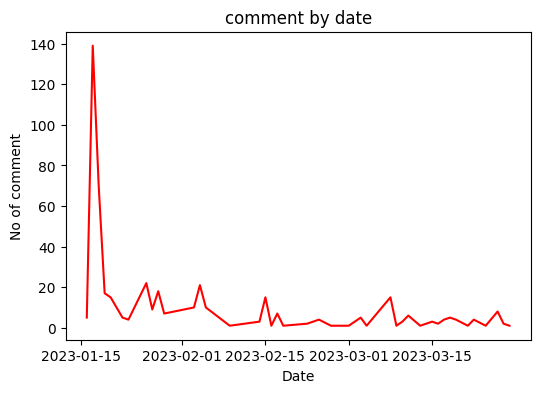

In [19]:
df.groupby(df["created_utc"]).size().plot(
    color="r",
    title="comment by date",
    figsize=(6,4),
    xlabel="Date",
    ylabel="No of comment")

<Axes: >

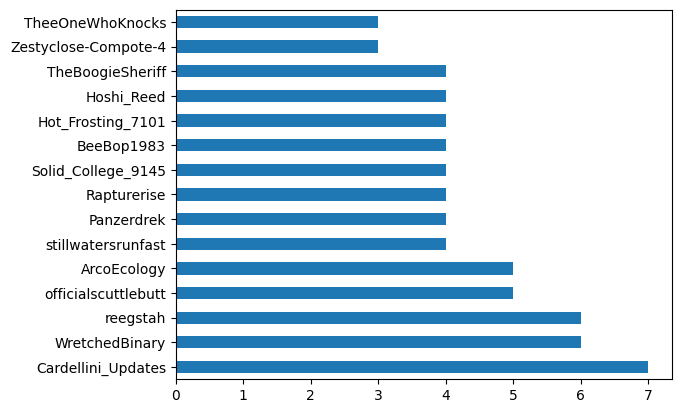

In [21]:
df["author"].value_counts().head(15).plot(kind="barh")

In [22]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [23]:
stopwords = nltk.corpus.stopwords.words('english')

In [27]:
import nltk

def clean_text(text, stopwords):
  """
  This function cleans text by removing stopwords and converting to lowercase.

  Args:
      text: String containing text to be cleaned.
      stopwords: List of stopwords to remove.

  Returns:
      A string containing the cleaned text.
  """
  # Lowercase the text
  text = text.lower()

  # Remove stopwords
  words = [word for word in text.split() if word not in stopwords]

  # Join the cleaned words back into a string
  cleaned_text = " ".join(words)

  return cleaned_text

# Download stopwords (one-time download)
nltk.download('stopwords')

# Load stopwords
stopwords = nltk.corpus.stopwords.words('english')

# Apply the function to the entire "body" column
df['cleaned_body'] = df['body'].apply(clean_text, args=(stopwords,))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
df["cleaned_body"]

0      **general discussion hub** overall season! pla...
1      joel's post-apocalyptic apartment better curre...
2      sometimes even moving like game... played game...
3      finished first episode, really loved it. thoug...
4      anybody else notice bookmarked page billboards...
                             ...                        
476                        think gonna like seasons 2&3.
477    mean that’s reality world. traveling world dan...
478    agree thought finale ridiculous. choices made ...
479    existed way back 70s. jimmy carter installed r...
480                                i'm glad hbo got hold
Name: cleaned_body, Length: 481, dtype: object

In [35]:
def clean_text(row):
  keep=[]
  text = df["body"].str.lower()
  stopwords = nltk.corpus.stopwords.words('english')
  for word in text.split():
    if not word in stopwords:
      keep.append(word)
    return " ".join(keep)
df['cleaned_body'] = df.apply(clean_text, axis=1)

AttributeError: 'Series' object has no attribute 'split'

In [36]:
from collections import Counter
counter= Counter();
for text in df["cleaned_body"].values:
  counter.update(text.split())
pd.DataFrame(counter.most_common(50),columns=["word","freq"])



,word,freq
0,like,133
1,game,95
2,would,71
3,show,67
4,joel,66
5,really,56
6,one,55
7,episode,55
8,think,52
9,first,48
